In [1]:
#import csbdeep
#from csbdeep import data
import skimage
from skimage import io
import os
import glob
import numpy as np
from skimage import exposure, measure
import matplotlib.pyplot as plt
import re
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
parent_dir = '/gpfs/data/lionnetlab/cellvision/pilotdata/20181009'

Cannot explain why this happens, but different shannon entropy values are returned if you do not initilaize tensorflow environment

In [10]:
# save each of 6 images
dapi_entropy_list = []
for root, dirs, files in os.walk(parent_dir):
    for file in files:
        if file.endswith(".tif"):
            print(os.path.join(root, file))
            
            # read in 700 image set
            imsk = io.imread(os.path.join(root, file))
            
            # one image is formatted differently than others
            if imsk.shape == (100, 7, 512, 512):
                imsk = imsk.reshape(700, 512, 512)
                print("image {} has wrong format. Format changed with numpy reshape.".format(file))
            
            #split from (700, 512, 512)
            imsk = np.split(imsk, 100) 
            imsk = np.array(imsk)
            
            # empty list for DAPI entropies
            #dapi_entropy_list = []
            
            for i in range(100):
                # get entropy for each DAPI imgage
                
                # select DAPI image 
                # hard-coded for DAPI column!
                dapi_img = imsk[i,6,:,:]
                cur_entropy = measure.shannon_entropy(dapi_img, base=2)
                dapi_entropy_list.append(cur_entropy)
            #plt.bar(range(100), dapi_entropy_list, width=1)
            #plt.ylim((6, 7.5))
            #plt.show()
            #
            # cut off of 6.7?
            
            #good_idx = np.arange(100)[dapi_entropy_list > 6.7]
            
            
                
            print(np.percentile(np.array(dapi_entropy_list), np.arange(0,100,5)))         

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined119.ome.tif
[6.64543599 6.66522819 6.68880386 6.70114613 6.72563519 6.73761001
 6.76852552 6.7827117  6.8051208  6.81739068 6.84246001 6.8691083
 6.90023585 6.92103511 6.93991697 6.95485394 6.96603916 6.97652904
 6.98726559 6.99498191]
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined117.ome.tif
[6.64543599 6.68068913 6.70217527 6.73002004 6.75377685 6.78072962
 6.80522506 6.82843502 6.86106919 6.89079533 6.91410866 6.93872975
 6.95500953 6.97091993 6.98763079 7.00650585 7.08131373 7.12985983
 7.14289141 7.16626918]
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined36.ome.tif
[6.54918506 6.57201585 6.58821443 6.60589935 6.61647495 6.62509224
 6.63782732 6.66490053 6.70183963 6.73459054 6.77933385 6.81525497
 6.86063472 6.90421712 6.93861266 6.9633157  6.98744819 7.03383405
 7.1297666  7.15201186]
/gpfs/data/lionnetlab/cellvision/pilotdata/20181

[6.43988665 6.53922738 6.59973723 6.6231755  6.64998102 6.68948811
 6.72497464 6.75010956 6.77304749 6.79820718 6.83355574 6.87211275
 6.90524349 6.94709075 6.98645688 7.0241682  7.06638183 7.11093933
 7.15036265 7.23159373]
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined17.ome.tif
[6.43988665 6.54575692 6.60032013 6.62259444 6.64762327 6.68642609
 6.72145651 6.74652002 6.76892162 6.7883991  6.81931618 6.86055785
 6.8965114  6.93445138 6.97738069 7.01755402 7.05980753 7.10678096
 7.14729072 7.22865589]
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined54.ome.tif
[6.43988665 6.52128785 6.57377797 6.61073954 6.63082466 6.66502033
 6.70332674 6.73463997 6.7595458  6.78129679 6.80627341 6.84486814
 6.88545788 6.92303475 6.96902217 7.00772889 7.05311212 7.10197205
 7.14288945 7.22692627]
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined102.ome.tif
[6.43988665 6.5227935  6.56523895 6.59729681 6.6

[6.43988665 6.5302094  6.56809958 6.59729681 6.6251189  6.65861528
 6.69981584 6.73523959 6.76176687 6.7847848  6.81519319 6.84834191
 6.88484143 6.92425763 6.96545291 7.00234055 7.03824756 7.08034478
 7.12623387 7.18462072]
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined3.ome.tif
[6.43988665 6.53058737 6.56944606 6.59885577 6.62665002 6.66384834
 6.70457361 6.73891263 6.76487152 6.78913538 6.81931618 6.85507694
 6.89059898 6.92971066 6.97107572 7.00790501 7.04291682 7.08581978
 7.1283714  7.18274674]
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined53.ome.tif
[6.43988665 6.53224278 6.57051148 6.60031667 6.62862782 6.66571343
 6.70623011 6.73965753 6.76429514 6.78736652 6.8151008  6.84779393
 6.88484143 6.9245345  6.96663989 7.00405578 7.04072567 7.08221598
 7.12726487 7.1804447 ]
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined76.ome.tif
[6.43988665 6.53404521 6.5716879  6.60158497 6.628

[6.43988665 6.53662694 6.56827671 6.59559366 6.62123737 6.64742519
 6.67878136 6.71415221 6.75075579 6.77878888 6.80952382 6.84158089
 6.87505595 6.9080808  6.95327443 6.99191903 7.02778772 7.063707
 7.10343373 7.1493824 ]
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined108.ome.tif
[6.43988665 6.53444998 6.56728554 6.59350387 6.61910934 6.64533256
 6.67650758 6.7121551  6.7487328  6.77593321 6.80479681 6.83829858
 6.87171705 6.90503562 6.95060454 6.99053207 7.02607581 7.06313292
 7.10254861 7.14875541]
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined34.ome.tif
[6.43988665 6.53507484 6.56770191 6.5947598  6.62060077 6.64726509
 6.67888955 6.71471647 6.75157175 6.77928931 6.80922665 6.84143656
 6.87523555 6.90883076 6.95465552 6.99326133 7.02894091 7.06343769
 7.10125014 7.14713336]
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined88.ome.tif
[6.43988665 6.53415506 6.56704115 6.59341614 6.619

[6.43988665 6.53404521 6.56743744 6.59552246 6.62322317 6.65017518
 6.68291697 6.71791967 6.75024017 6.77537365 6.80376493 6.83608597
 6.87122062 6.90664602 6.94857136 6.98941859 7.0271196  7.06408892
 7.10304976 7.1564861 ]
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined63.ome.tif
[6.43988665 6.5341861  6.56775066 6.59637322 6.62396343 6.65145874
 6.68458269 6.72038771 6.75142296 6.77631773 6.8045236  6.83611358
 6.86981606 6.90462402 6.94465203 6.98766978 7.02589491 7.06339841
 7.10213425 7.15583735]
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined37.ome.tif
[6.43988665 6.53439143 6.56825179 6.59753806 6.62484824 6.65323917
 6.68700532 6.72290777 6.75318592 6.77911949 6.80759624 6.83884053
 6.87374142 6.90914718 6.9520755  6.99291401 7.03219962 7.06797698
 7.10907878 7.16914712]
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined56.ome.tif
[6.43988665 6.53480054 6.56894383 6.59846991 6.62

In [3]:
# save each of 6 images
channel_count = 6
cutoff = 6.8
target_dir = '/gpfs/data/lionnetlab/cellvision/pilotdata/20181009-top50'

In [39]:
image_number = 0
os.chdir(target_dir)
for root, dirs, files in os.walk(parent_dir):
    for file in files:
        if file.endswith(".tif"):
            print(os.path.join(root, file))
            
            # read in 700 image set
            imsk = io.imread(os.path.join(root, file))
            
            
            # one image is formatted differently than others
            if imsk.shape == (100, 7, 512, 512):
                imsk = imsk.reshape(700, 512, 512)
                print("image {} has wrong format. Format changed with numpy reshape.".format(file))
            
            #split from (700, 512, 512)
            imsk = np.split(imsk, 100) 
            imsk = np.array(imsk)
            
            # empty list for DAPI entropies
            #dapi_entropy_list = []
            
            for i in range(100):
                # get entropy for each DAPI imgage
                
                # select DAPI image 
                # hard-coded for DAPI column!
                dapi_img = imsk[i,6,:,:]
                cur_entropy = measure.shannon_entropy(dapi_img, base=2)
                if cur_entropy >= cutoff:
                    for j in range(channel_count):
                        try :
                            sample_str = re.findall(r'\d+', str(file))[1]
                        except : # one has no number, fill in with 999
                            sample_str = '$'
                        #print('sample{}_channel{}_z{}.tif'.format(sample_str, j+1, i+1))
                        io.imsave('sample{}_channel{}_z{}.tif'.format(sample_str, j+1, i+1), imsk[i,j,:,:])
                        image_number += 1
                        if image_number % 200 == 0:
                            print('{} images written'.format(image_number))

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined119.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/external/tifffile/tifffile.py:1752: UserWarning: ome-xml: not an ome-tiff master file
  warnings.warn("ome-xml: not an ome-tiff master file")
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel3_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_c

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel1_z13.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel2_z13.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel3_z13.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel1_z14.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel2_z14.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel3_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel4_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel2_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel3_z26.tif

200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel1_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel2_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel3_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel4_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel1_z38.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel1_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel2_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel3_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel4_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel1_z50.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel5_z56.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel6_z56.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel1_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel2_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample119_channel3_z57.tif

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined117.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel3_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel2_z2.tif is a

400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel2_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel3_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel1_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel2_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel3_z10.tif i

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel2_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel3_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel2_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel3_z26.tif

600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel2_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel3_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel4_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel1_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel2_z42.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel1_z53.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel2_z53.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel3_z53.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel4_z53.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel5_z53.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel6_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel1_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel2_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel3_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel4_z65.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel3_z72.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel4_z72.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel5_z72.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel6_z72.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel1_z73.tif

800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel2_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel3_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel4_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel5_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample117_channel6_z76.tif

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined36.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined112.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel1_z3.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel1_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel2_z23.tif

1000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel2_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel1_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel2_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel3_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel1_z31.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel1_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel2_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel3_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel1_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel2_z46.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel1_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel2_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel3_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel4_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel1_z58.tif

1200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel4_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel5_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel1_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel2_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel3_z61.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel3_z71.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel4_z71.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel5_z71.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel6_z71.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample112_channel1_z72.tif

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined25.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel1_z3.tif is a low 

1400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel1_z24.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel2_z24.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel1_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel2_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel1_z26.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel1_z44.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel2_z44.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel3_z44.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel1_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel2_z45.tif is a

1600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel1_z56.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel2_z56.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel3_z56.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel1_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel2_z57.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel1_z72.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel2_z72.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel3_z72.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel4_z72.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample25_channel1_z73.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined78.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined57.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample57_channel1_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample57_channel2_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample57_channel1_z11.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample57_channel2_z11.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample57_channel1_z12.tif is a

1800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample57_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample57_channel3_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample57_channel1_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample57_channel2_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample57_channel3_z23.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample57_channel2_z38.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample57_channel3_z38.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample57_channel1_z39.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample57_channel2_z39.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample57_channel3_z39.tif is a

2000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample57_channel1_z54.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample57_channel2_z54.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample57_channel3_z54.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample57_channel4_z54.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample57_channel1_z55.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined87.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined1.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel1_z3.tif is a low contr

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel2_z20.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel1_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel2_z22.tif is a low 

2200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel1_z28.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel2_z28.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel1_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel2_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel1_z30.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel1_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel2_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel3_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel1_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel2_z49.tif is a low 

2400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel1_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel2_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel3_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel1_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel2_z65.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel1_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel2_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel3_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel4_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample1_channel1_z80.tif is a low 

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined30.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined114.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel3_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel2_z2.tif is a

2600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel1_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel2_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel3_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel1_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel2_z10.tif is

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel1_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel2_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel3_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel2_z26.tif

2800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel1_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel2_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel3_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel1_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel2_z42.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel2_z53.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel3_z53.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel4_z53.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel1_z54.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel2_z54.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel3_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel4_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel1_z66.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel2_z66.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel3_z66.tif

3000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel2_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel3_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel4_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel5_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel6_z73.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel1_z81.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel2_z81.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel3_z81.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel4_z81.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel5_z81.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel4_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel5_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel6_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel1_z89.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel2_z89.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel3_z96.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel4_z96.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel5_z96.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel6_z96.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample114_channel1_z97.tif

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined109.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel3_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel2_z2.tif is a

3200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel3_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel1_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel2_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel3_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel1_z11.tif 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel2_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel3_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel1_z27.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel2_z27.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel3_z27.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel1_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel2_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel3_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel4_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel1_z43.tif

3400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel1_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel2_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel3_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel4_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel1_z47.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel2_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel3_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel4_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel1_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel2_z58.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel1_z68.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel2_z68.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel3_z68.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel4_z68.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel5_z68.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel1_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel2_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel3_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel4_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample109_channel5_z77.tif

3600 images written
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined116.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample116_channel1_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample116_channel2_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample116_channel3_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample116_channel4_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample116_channel1_z10.tif is 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample116_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample116_channel3_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample116_channel4_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample116_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample116_channel2_z22.tif

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined55.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel1_z3.tif is a low 

3800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel1_z13.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel2_z13.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel1_z14.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel2_z14.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel1_z15.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel1_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel2_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel3_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel1_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel2_z37.tif is a

4000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel1_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel2_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel3_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel1_z50.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel2_z50.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel2_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel3_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel4_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel1_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample55_channel2_z65.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined65.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel1_z3.tif is a low 

4200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel1_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel2_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel1_z11.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel2_z11.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel1_z12.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel1_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel2_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel1_z32.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel2_z32.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel1_z33.tif is a

4400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel3_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel1_z44.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel2_z44.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel3_z44.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel1_z45.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel1_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel2_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel3_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel4_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel1_z61.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel1_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel2_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel3_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel4_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel5_z73.tif is a

4600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample65_channel6_z82.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined39.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample39_channel1_z18.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample39_channel2_z18.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample39_channel3_z18.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample39_channel1_z56.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample39_channel2_z56.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined85.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel1_z3.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel1_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel2_z23.tif is a

4800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel1_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel2_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel3_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel1_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel2_z30.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel1_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel2_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel3_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel1_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel2_z46.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel5_z56.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel6_z56.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel1_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel2_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel3_z57.tif is a

5000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel2_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel3_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel4_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel5_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample85_channel6_z64.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined44.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel1_z3.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel1_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel2_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel1_z24.tif is a

5200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel1_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel2_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel1_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel2_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel1_z32.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel1_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel2_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel3_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel1_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel2_z47.tif is a

5400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel1_z62.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel2_z62.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel3_z62.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel1_z63.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel2_z63.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel1_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel2_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel3_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel4_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel1_z78.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel4_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel5_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel1_z89.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel2_z89.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel3_z89.tif is a

5600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel1_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel2_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel3_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel4_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample44_channel5_z95.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined43.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel1_z3.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel1_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel1_z23.tif is a

5800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel1_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel2_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel1_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel2_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel1_z31.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel1_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel2_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel3_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel1_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel2_z46.tif is a

6000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel1_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel2_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel3_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel4_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel1_z62.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel1_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel2_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel3_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel4_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample43_channel5_z73.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined60.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample60_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample60_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample60_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample60_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample60_channel1_z3.tif is a low 

6200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample60_channel2_z13.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample60_channel1_z14.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample60_channel2_z14.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample60_channel1_z15.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample60_channel2_z15.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample60_channel1_z34.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample60_channel2_z34.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample60_channel3_z34.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample60_channel1_z35.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample60_channel2_z35.tif is a

6400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample60_channel1_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample60_channel2_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample60_channel3_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample60_channel1_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample60_channel2_z47.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined115.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined59.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined8.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel1_z3.tif is a low contr

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel1_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel2_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel1_z24.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel2_z24.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel1_z25.tif is a low 

6600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel1_z27.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel2_z27.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel1_z28.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel2_z28.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel1_z29.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel2_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel1_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel2_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel1_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel2_z49.tif is a low 

6800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel2_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel3_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel1_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel2_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel3_z60.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel2_z75.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel3_z75.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel1_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel2_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel3_z76.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel4_z91.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel1_z92.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel2_z92.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel3_z92.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel4_z92.tif is a low 

7000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel3_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel4_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel1_z96.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel2_z96.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample8_channel3_z96.tif is a low 

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined106.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel1_z3.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel1_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel2_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel3_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel1_z18.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel2_z18.tif

7200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel1_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel2_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel3_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel2_z26.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel2_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel3_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel1_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel2_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel3_z42.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel3_z53.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel4_z53.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel1_z54.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel2_z54.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel3_z54.tif

7400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel1_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel2_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel3_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel4_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel1_z62.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel1_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel2_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel3_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel4_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel5_z73.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel6_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel1_z80.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel2_z80.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel3_z80.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel4_z80.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel4_z87.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel5_z87.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel6_z87.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel1_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel2_z88.tif

7600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel1_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel2_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel3_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel4_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample106_channel5_z95.tif

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined66.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample66_channel1_z20.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample66_channel2_z20.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample66_channel3_z20.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample66_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample66_channel2_z22.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined83.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel1_z3.tif is a low 

7800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel2_z15.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel1_z16.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel2_z16.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel1_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel2_z17.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel1_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel2_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel1_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel2_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel1_z38.tif is a

8000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel1_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel2_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel1_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel2_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel1_z50.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel1_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel2_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel3_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel1_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel2_z65.tif is a

8200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel1_z80.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel2_z80.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel3_z80.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel4_z80.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel1_z81.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel2_z97.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel3_z97.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel4_z97.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel5_z97.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample83_channel6_z97.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined110.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel1_z3.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel1_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel1_z23.tif

8400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel1_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel2_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel2_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel1_z27.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel1_z40.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel2_z40.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel3_z40.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel1_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel2_z41.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel1_z55.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel2_z55.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel3_z55.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel4_z55.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel1_z56.tif

8600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel1_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel2_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel3_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel4_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel1_z60.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel2_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel3_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel4_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel1_z71.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel2_z71.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel6_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel1_z80.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel2_z80.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel3_z80.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel4_z80.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel4_z86.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel5_z86.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel6_z86.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel1_z87.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel2_z87.tif

8800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel1_z93.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel2_z93.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel3_z93.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel4_z93.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel5_z93.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel2_z100.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel3_z100.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel4_z100.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel5_z100.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample110_channel6_z10

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined17.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample17_channel1_z35.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample17_channel2_z35.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample17_channel3_z35.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample17_channel1_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample17_channel2_z36.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined54.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined102.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined35.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined71.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel1_z3.tif is a low 

9000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel1_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel1_z23.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel2_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel1_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel2_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel1_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel2_z43.tif is a

9200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel1_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel2_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel3_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel1_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel2_z58.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel2_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel3_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel1_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel2_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample71_channel3_z74.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined107.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample107_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample107_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample107_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample107_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample107_channel1_z5.tif is a

9400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample107_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample107_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample107_channel3_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample107_channel1_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample107_channel2_z23.tif

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined40.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample40_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample40_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample40_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample40_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample40_channel1_z3.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample40_channel1_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample40_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample40_channel3_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample40_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample40_channel2_z22.tif is a

9600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample40_channel1_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample40_channel2_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample40_channel3_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample40_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample40_channel2_z26.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample40_channel1_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample40_channel2_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample40_channel3_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample40_channel1_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample40_channel2_z42.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined96.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel3_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel2_z2.tif is a low 

9800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel2_z13.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel3_z13.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel1_z14.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel2_z14.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel3_z14.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel3_z27.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel1_z28.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel2_z28.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel3_z28.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel1_z29.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel4_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel1_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel2_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel3_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel4_z42.tif is a

10000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel3_z44.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel4_z44.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel1_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel2_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel3_z45.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel3_z53.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel4_z53.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel5_z53.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel1_z54.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel2_z54.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel6_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel1_z62.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel2_z62.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel3_z62.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel4_z62.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel3_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel4_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel5_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel6_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample96_channel1_z72.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined49.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel1_z3.tif is a low 

10200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel1_z8.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel2_z8.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel1_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel2_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel1_z10.tif is a low

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel2_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel3_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel1_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel2_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel3_z30.tif is a

10400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel1_z39.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel2_z39.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel3_z39.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel1_z40.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel2_z40.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel1_z52.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel2_z52.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel3_z52.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel4_z52.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel1_z53.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel2_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel3_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel4_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel5_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample49_channel6_z60.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined100.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel1_z3.tif is a

10600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel1_z14.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel2_z14.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel1_z15.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel2_z15.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel1_z16.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel3_z34.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel1_z35.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel2_z35.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel3_z35.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel1_z36.tif

10800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel4_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel1_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel2_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel3_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel1_z49.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel4_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel1_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel2_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel3_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel4_z60.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel2_z71.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel3_z71.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel4_z71.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel5_z71.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel1_z72.tif

11000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel6_z78.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel1_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel2_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel3_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel4_z79.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel2_z86.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel3_z86.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel4_z86.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel5_z86.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel6_z86.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel6_z93.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel1_z94.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel2_z94.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel3_z94.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample100_channel4_z94.tif

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined33.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined52.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel1_z3.tif is a low 

11200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel2_z14.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel1_z15.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel2_z15.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel1_z16.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel2_z16.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel1_z34.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel2_z34.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel1_z35.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel2_z35.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel1_z36.tif is a

11400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel3_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel1_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel2_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel3_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel1_z48.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel1_z63.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel2_z63.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel3_z63.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel4_z63.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel1_z64.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel2_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel3_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel4_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel5_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel6_z73.tif is a

11600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel4_z80.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel5_z80.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel6_z80.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel1_z81.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel2_z81.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel5_z87.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel6_z87.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel1_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel2_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample52_channel3_z88.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined84.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample84_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample84_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample84_channel3_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample84_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample84_channel2_z2.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample84_channel1_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample84_channel2_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample84_channel3_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample84_channel1_z18.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample84_channel2_z18.tif is a

11800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample84_channel1_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample84_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample84_channel3_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample84_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample84_channel2_z22.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined81.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined28.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel1_z3.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel1_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel1_z23.tif is a

12000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel1_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel2_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel2_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel1_z27.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel1_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel2_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel3_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel1_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel2_z46.tif is a

12200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel2_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel3_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel1_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel2_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel3_z61.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel2_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel3_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel4_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel1_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample28_channel2_z77.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined15.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel1_z3.tif is a low 

12400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel1_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel2_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel1_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel2_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel1_z11.tif is a l

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel2_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel1_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel2_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel1_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel2_z31.tif is a

12600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel1_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel2_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel1_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel2_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel3_z43.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel3_z56.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel1_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel2_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel3_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel1_z58.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel3_z72.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel4_z72.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel1_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel2_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel3_z73.tif is a

12800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel3_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel4_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel1_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel2_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample15_channel3_z77.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined27.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample27_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample27_channel2_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined20.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample20_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample20_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample20_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample20_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample20_channel1_z3.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample20_channel1_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample20_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample20_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample20_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample20_channel1_z23.tif is a

13000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample20_channel1_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample20_channel2_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample20_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample20_channel2_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample20_channel1_z27.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample20_channel1_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample20_channel2_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample20_channel3_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample20_channel1_z44.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample20_channel2_z44.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined16.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel1_z3.tif is a low 

13200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel2_z13.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel1_z14.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel2_z14.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel1_z15.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel2_z15.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel1_z35.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel2_z35.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel1_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel2_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel1_z37.tif is a

13400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel3_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel1_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel2_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel3_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel1_z49.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel1_z63.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel2_z63.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel3_z63.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel1_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel2_z64.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel2_z75.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel3_z75.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel4_z75.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel1_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel2_z76.tif is a

13600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel3_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel4_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel1_z80.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel2_z80.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample16_channel3_z80.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined113.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample113_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample113_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample113_channel3_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample113_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample113_channel2_z2.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample113_channel2_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample113_channel3_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample113_channel1_z18.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample113_channel2_z18.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample113_channel3_z18.tif

13800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample113_channel2_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample113_channel3_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample113_channel1_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample113_channel2_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample113_channel3_z30.tif

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined38.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel1_z3.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel1_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel2_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel1_z24.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel2_z24.tif is a

14000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel2_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel1_z27.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel2_z27.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel1_z28.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel2_z28.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel2_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel3_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel1_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel2_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel3_z47.tif is a

14200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel2_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel3_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel1_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel2_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel3_z59.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel1_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel2_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel3_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel4_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel1_z71.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel6_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel1_z78.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel2_z78.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel3_z78.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample38_channel4_z78.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined62.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel1_z3.tif is a low 

14400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel2_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel1_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel2_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel1_z11.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel2_z11.tif is a 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel1_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel2_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel1_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel2_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel1_z32.tif is a

14600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel2_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel3_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel1_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel2_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel3_z43.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel1_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel2_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel3_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel1_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel2_z59.tif is a

14800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel1_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel2_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel3_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel4_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample62_channel1_z75.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined95.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel1_z3.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel1_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel3_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel2_z22.tif is a

15000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel3_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel2_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel3_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel1_z27.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel2_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel3_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel1_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel2_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel3_z42.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel1_z54.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel2_z54.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel3_z54.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel4_z54.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel1_z55.tif is a

15200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel1_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel2_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel3_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel4_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel1_z59.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel2_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel3_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel4_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel5_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample95_channel1_z71.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined74.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel1_z3.tif is a low 

15400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel1_z13.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel2_z13.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel1_z14.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel2_z14.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel1_z15.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel2_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel3_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel1_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel2_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel3_z31.tif is a

15600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel2_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel3_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel1_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel2_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel3_z47.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel1_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel2_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel3_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel4_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel5_z58.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel2_z66.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel3_z66.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel4_z66.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel5_z66.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample74_channel6_z66.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined32.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel1_z3.tif is a low 

15800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel2_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel1_z18.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel2_z18.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel1_z19.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel2_z19.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel2_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel1_z38.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel2_z38.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel1_z39.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel2_z39.tif is a

16000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel2_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel3_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel1_z50.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel2_z50.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel3_z50.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel1_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel2_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel3_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel1_z66.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel2_z66.tif is a

16200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel2_z81.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel3_z81.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel4_z81.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel1_z82.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample32_channel2_z82.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined21.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel1_z3.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel1_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel1_z23.tif is a

16400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel1_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel2_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel1_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel2_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel1_z31.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel2_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel3_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel1_z50.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel2_z50.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel3_z50.tif is a

16600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel1_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel2_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel3_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel1_z66.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample21_channel2_z66.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined3.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel1_z3.tif is a low contr

16800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel2_z24.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel1_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel2_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel2_z26.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel1_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel2_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel3_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel1_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel2_z49.tif is a low 

17000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel3_z56.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel1_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel2_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel3_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel1_z58.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel2_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel3_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel4_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel1_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel2_z74.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel1_z84.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel2_z84.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel3_z84.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel4_z84.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel5_z84.tif is a low 

17200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel2_z93.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel3_z93.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel4_z93.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel5_z93.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample3_channel6_z93.tif is a low 

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined53.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample53_channel1_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample53_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample53_channel1_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample53_channel2_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample53_channel1_z27.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample53_channel1_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample53_channel2_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample53_channel3_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample53_channel1_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample53_channel2_z46.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined76.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined7.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel1_z3.tif is a low contr

17400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel2_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel1_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel2_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel1_z11.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel2_z11.tif is a low c

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel1_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel2_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel1_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel2_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel1_z31.tif is a low 

17600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel2_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel1_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel2_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel1_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel2_z47.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel3_z63.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel1_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel2_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel3_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel1_z65.tif is a low 

17800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel1_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel2_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel3_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel1_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel2_z77.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel3_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel4_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample7_channel5_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined89.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel3_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel2_z2.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel3_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel1_z18.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel2_z18.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel3_z18.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel1_z19.tif is a

18000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel3_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel3_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel1_z23.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel1_z34.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel2_z34.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel3_z34.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel4_z34.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel1_z35.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel1_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel2_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel3_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel4_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample89_channel1_z48.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined86.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample86_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample86_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample86_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample86_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample86_channel1_z3.tif is a low 

18200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample86_channel1_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample86_channel2_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample86_channel1_z6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample86_channel2_z6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample86_channel1_z7.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample86_channel2_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample86_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample86_channel2_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample86_channel3_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample86_channel1_z27.tif is a

18400 images written
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined105.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample105_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample105_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample105_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample105_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample105_channel1_z3.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample105_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample105_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample105_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample105_channel1_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample105_channel2_z23.tif

18600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample105_channel1_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample105_channel2_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample105_channel3_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined5.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel1_z3.tif is a low contr

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel1_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel2_z23.tif is a low 

18800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel1_z33.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel2_z33.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel1_z34.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel2_z34.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel3_z34.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel2_z50.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel3_z50.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel1_z51.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel2_z51.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel3_z51.tif is a low 

19000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel1_z67.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel2_z67.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel3_z67.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel1_z68.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel2_z68.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel3_z83.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel1_z84.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel2_z84.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel3_z84.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample5_channel1_z85.tif is a low 

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined70.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined19.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined99.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined91.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel3_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel2_z2.tif is a low 

19200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel1_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel2_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel3_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel1_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel2_z10.tif is a lo

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel1_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel2_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel3_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel2_z26.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel1_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel2_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel3_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel1_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel2_z42.tif is a

19400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel1_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel2_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel3_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel1_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel2_z46.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel1_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel2_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel3_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel4_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel5_z57.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel1_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel2_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel3_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel4_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel5_z65.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel1_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel2_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel3_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel4_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample91_channel5_z73.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined69.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample69_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample69_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample69_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample69_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample69_channel3_z2.tif is a low 

19600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample69_channel3_z4.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample69_channel1_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample69_channel2_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample69_channel3_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample69_channel1_z6.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample69_channel2_z20.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample69_channel3_z20.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample69_channel1_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample69_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample69_channel3_z21.tif is a

19800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample69_channel2_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample69_channel3_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample69_channel1_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample69_channel2_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample69_channel3_z37.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined51.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel1_z3.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel1_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel1_z23.tif is a

20000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel1_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel2_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel2_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel1_z27.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel2_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel3_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel1_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel2_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel3_z46.tif is a

20200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel2_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel3_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel1_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel2_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel3_z58.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel3_z69.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel4_z69.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel1_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel2_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel3_z70.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel1_z81.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel2_z81.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel3_z81.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel4_z81.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample51_channel5_z81.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined68.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined41.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel1_z3.tif is a low 

20400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel1_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel2_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel1_z6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel2_z6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel1_z7.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel2_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel2_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel1_z27.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel2_z27.tif is a

20600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel1_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel2_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel3_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel1_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel2_z42.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel3_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel1_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel2_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel3_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel1_z59.tif is a

20800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel2_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel3_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel1_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel2_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel3_z74.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel2_z85.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel3_z85.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel4_z85.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel5_z85.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel1_z86.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel1_z96.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel2_z96.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel3_z96.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel4_z96.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample41_channel5_z96.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined48.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined29.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined.ome.tif
image test data_1_MMStack_Undefined.ome.tif has wrong format. Format changed with numpy reshape.


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel1_z3.tif is a low contr

21000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel3_z4.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel1_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel2_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel3_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel1_z6.tif is a low contr

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel1_z20.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel2_z20.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel3_z20.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel1_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel2_z21.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel1_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel2_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel3_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel1_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel2_z37.tif is a low 

21200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel1_z40.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel2_z40.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel3_z40.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel1_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel2_z41.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel1_z55.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel2_z55.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel3_z55.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel1_z56.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel2_z56.tif is a low 

21400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel1_z71.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel2_z71.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel3_z71.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel1_z72.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel2_z72.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel1_z87.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel2_z87.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel3_z87.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel1_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample$_channel2_z88.tif is a low 

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined2.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel1_z3.tif is a low contr

21600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel1_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel2_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel1_z6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel2_z6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel1_z7.tif is a low contr

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel1_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel2_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel2_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel1_z27.tif is a low 

21800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel1_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel2_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel3_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel1_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel2_z42.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel1_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel2_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel3_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel1_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample2_channel2_z58.tif is a low 

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined77.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel1_z3.tif is a low 

22000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel1_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel2_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel1_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel2_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel1_z11.tif is a l

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel1_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel2_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel1_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel2_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel1_z32.tif is a

22200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel1_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel2_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel3_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel1_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel2_z43.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel1_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel2_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel3_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel1_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel2_z59.tif is a

22400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel2_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel3_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel4_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel1_z75.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel2_z75.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel3_z85.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel4_z85.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel5_z85.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel6_z85.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample77_channel1_z86.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined26.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined82.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel1_z3.tif is a low 

22600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel1_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel1_z23.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel2_z40.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel3_z40.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel1_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel2_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel3_z41.tif is a

22800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel1_z52.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel2_z52.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel3_z52.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel4_z52.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel1_z53.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel2_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel3_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel4_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel5_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample82_channel6_z65.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined118.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel3_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel2_z2.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel3_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel1_z18.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel2_z18.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel3_z18.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel1_z19.tif

23000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel1_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel3_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel2_z22.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel1_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel2_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel3_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel4_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel1_z38.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel1_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel2_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel3_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel4_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample118_channel5_z49.tif

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined4.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel1_z3.tif is a low contr

23200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel1_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel2_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel1_z6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel2_z6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel1_z7.tif is a low contr

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel2_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel2_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel1_z27.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel2_z27.tif is a low 

23400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel2_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel1_z38.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel2_z38.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel1_z39.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel2_z39.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel1_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel2_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel3_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel1_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel2_z58.tif is a low 

23600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel2_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel3_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel1_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel2_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel3_z74.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel1_z89.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel2_z89.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel3_z89.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel4_z89.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel1_z90.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel1_z100.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel2_z100.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel3_z100.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample4_channel4_z100.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined10.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel3_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel2_z2.tif is a low 

23800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel1_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel2_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel3_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel1_z6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel2_z6.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel2_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel2_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel1_z27.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel2_z27.tif is a

24000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel2_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel3_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel1_z38.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel2_z38.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel1_z39.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel1_z54.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel2_z54.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel3_z54.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel1_z55.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel2_z55.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel1_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel2_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel3_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel1_z71.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel2_z71.tif is a

24200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel1_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel2_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel3_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel1_z75.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample10_channel2_z75.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined108.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample108_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample108_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample108_channel1_z4.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample108_channel2_z4.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample108_channel1_z5.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined34.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel1_z3.tif is a low 

24400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel1_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel2_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel1_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel2_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel1_z11.tif is a l

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel2_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel1_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel2_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel1_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel2_z31.tif is a

24600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel1_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel2_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel3_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel1_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel2_z42.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel1_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel2_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel3_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel1_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel2_z58.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel1_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel2_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel3_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel4_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel1_z74.tif is a

24800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel1_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel2_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel3_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel4_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel1_z78.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel6_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel1_z89.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel2_z89.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel3_z89.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel4_z89.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample34_channel6_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined88.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample88_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample88_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample88_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample88_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample88_channel1_z3.tif is a low 

25000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample88_channel2_z13.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample88_channel3_z13.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample88_channel1_z14.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample88_channel2_z14.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample88_channel3_z14.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample88_channel2_z28.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample88_channel3_z28.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample88_channel1_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample88_channel2_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample88_channel3_z29.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined75.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined80.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined31.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel1_z3.tif is a low 

25200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel1_z16.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel2_z16.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel1_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel2_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel1_z18.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel1_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel2_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel1_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel2_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel1_z38.tif is a

25400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel1_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel2_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel3_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel1_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel2_z49.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel1_z63.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel2_z63.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel3_z63.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel1_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel2_z64.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel1_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel2_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel3_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel4_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel1_z80.tif is a

25600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel2_z83.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel3_z83.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel4_z83.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel1_z84.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel2_z84.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel2_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel3_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel4_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel5_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample31_channel6_z95.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined94.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample94_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample94_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample94_channel3_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample94_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample94_channel2_z2.tif is a low 

25800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample94_channel1_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample94_channel2_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample94_channel3_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample94_channel1_z18.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample94_channel2_z18.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample94_channel1_z33.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample94_channel2_z33.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample94_channel3_z33.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample94_channel1_z34.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample94_channel2_z34.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined92.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined45.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel1_z3.tif is a low 

26000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel2_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel1_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel2_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel1_z11.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel2_z11.tif is a 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel1_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel2_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel1_z32.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel2_z32.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel1_z33.tif is a

26200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel1_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel2_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel3_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel1_z44.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel2_z44.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel1_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel2_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel3_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel1_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel2_z60.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel1_z71.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel2_z71.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel3_z71.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel4_z71.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel1_z72.tif is a

26400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel1_z75.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel2_z75.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel3_z75.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel4_z75.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel5_z75.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel4_z82.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel5_z82.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel6_z82.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel1_z83.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample45_channel2_z83.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined6.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel1_z3.tif is a low contr

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel1_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel1_z23.tif is a low 

26600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel2_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel1_z27.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel2_z27.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel1_z28.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel1_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel2_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel3_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel1_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel2_z47.tif is a low 

26800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel1_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel2_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel3_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel1_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel2_z59.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel1_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel2_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel3_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel1_z75.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample6_channel2_z75.tif is a low 

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined14.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample14_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample14_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample14_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample14_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample14_channel1_z3.tif is a low 

27000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample14_channel1_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample14_channel2_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample14_channel1_z6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample14_channel2_z6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample14_channel1_z7.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample14_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample14_channel2_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample14_channel1_z28.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample14_channel2_z28.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample14_channel1_z29.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined24.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample24_channel1_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample24_channel2_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined13.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel1_z3.tif is a low 

27200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel2_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel1_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel2_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel1_z11.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel2_z11.tif is a 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel1_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel2_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel1_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel2_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel1_z32.tif is a

27400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel2_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel3_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel1_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel2_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel3_z43.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel2_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel3_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel1_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel2_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel3_z59.tif is a

27600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel1_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel2_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel3_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel1_z75.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel2_z75.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel4_z86.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel1_z87.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel2_z87.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel3_z87.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample13_channel4_z87.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined93.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample93_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample93_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample93_channel3_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample93_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample93_channel2_z2.tif is a low 

27800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample93_channel1_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample93_channel2_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample93_channel3_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample93_channel1_z18.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample93_channel2_z18.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined104.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample104_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample104_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample104_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample104_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample104_channel1_z3.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined11.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel1_z3.tif is a low 

28000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel2_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel1_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel2_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel1_z11.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel2_z11.tif is a 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel1_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel2_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel1_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel2_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel1_z31.tif is a

28200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel1_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel2_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel1_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel2_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel1_z43.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel1_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel2_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel3_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel1_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel2_z58.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel1_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel2_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel3_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel1_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel2_z74.tif is a

28400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel1_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel2_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel3_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel4_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample11_channel1_z78.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined46.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel1_z3.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel1_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel1_z23.tif is a

28600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel2_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel2_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel1_z27.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel2_z27.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel1_z44.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel2_z44.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel3_z44.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel1_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel2_z45.tif is a

28800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel1_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel2_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel3_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel1_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel2_z61.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel3_z75.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel1_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel2_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel3_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel1_z77.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel1_z91.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel2_z91.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel3_z91.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel4_z91.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel1_z92.tif is a

29000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel1_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel2_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel3_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel4_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample46_channel5_z95.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined22.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined103.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined9.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel1_z3.tif is a low contr

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel1_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel2_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel1_z24.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel2_z24.tif is a low 

29200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel2_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel1_z27.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel2_z27.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel1_z28.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel2_z28.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel1_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel2_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel1_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel2_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel1_z49.tif is a low 

29400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel2_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel3_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel1_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel2_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample9_channel3_z60.tif is a low 

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined79.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel1_z3.tif is a low 

29600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel1_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel2_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel3_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel1_z24.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel2_z24.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel3_z39.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel1_z40.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel2_z40.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel3_z40.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel1_z41.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel3_z51.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel4_z51.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel1_z52.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel2_z52.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel3_z52.tif is a

29800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel3_z55.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel4_z55.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel5_z55.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel6_z55.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel1_z56.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel1_z68.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel2_z68.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel3_z68.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel4_z68.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample79_channel5_z68.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined97.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel1_z3.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel1_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel1_z23.tif is a

30000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel1_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel2_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel2_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel1_z27.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel2_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel3_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel1_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel2_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel3_z47.tif is a

30200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel1_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel2_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel3_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel1_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel2_z59.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel3_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel4_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel5_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel1_z71.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample97_channel2_z71.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined12.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel1_z3.tif is a low 

30400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel2_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel1_z18.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel2_z18.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel1_z19.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel2_z19.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel1_z35.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel2_z35.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel1_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel2_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel1_z37.tif is a

30600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel3_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel1_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel2_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel1_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel2_z49.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel1_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel2_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel3_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel1_z65.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel2_z65.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel2_z80.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel3_z80.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel1_z81.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel2_z81.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel3_z81.tif is a

30800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel2_z84.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel3_z84.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel1_z85.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel2_z85.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel3_z85.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel2_z96.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel3_z96.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel4_z96.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel1_z97.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample12_channel2_z97.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined50.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample50_channel1_z34.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample50_channel2_z34.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample50_channel3_z34.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample50_channel1_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample50_channel2_z36.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined67.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel1_z3.tif is a low 

31000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel1_z14.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel2_z14.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel1_z15.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel2_z15.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel1_z16.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel2_z35.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel1_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel2_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel1_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel2_z37.tif is a

31200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel2_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel3_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel1_z44.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel2_z44.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel3_z44.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel1_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel2_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel3_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel4_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel1_z60.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel2_z69.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel3_z69.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel4_z69.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel5_z69.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample67_channel6_z69.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined58.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel1_z3.tif is a low 

31400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel1_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel2_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel1_z6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel2_z6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel1_z7.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel2_z27.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel1_z28.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel2_z28.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel1_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel2_z29.tif is a

31600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel2_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel1_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel2_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel1_z38.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel2_z38.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel1_z52.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel2_z52.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel3_z52.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel1_z53.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel2_z53.tif is a

31800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel1_z68.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel2_z68.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel3_z68.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel4_z68.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel1_z69.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel1_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel2_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel3_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel4_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample58_channel5_z79.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined63.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel1_z4.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel2_z4.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel1_z6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel2_z6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel1_z8.tif is a low 

32000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel1_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel2_z25.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel1_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel2_z26.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel1_z27.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel1_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel2_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel3_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel1_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel2_z42.tif is a

32200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel1_z56.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel2_z56.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel3_z56.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel1_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel2_z57.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel3_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel4_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel1_z75.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel2_z75.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample63_channel3_z75.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined37.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel1_z3.tif is a low 

32400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel2_z17.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel1_z18.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel2_z18.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel1_z19.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel2_z19.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel1_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel2_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel1_z38.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel2_z38.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel1_z39.tif is a

32600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel1_z51.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel2_z51.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel1_z52.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel2_z52.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel3_z52.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel1_z67.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel2_z67.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel3_z67.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel1_z68.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel2_z68.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel1_z82.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel2_z82.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel3_z82.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel4_z82.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel1_z83.tif is a

32800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel1_z86.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel2_z86.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel3_z86.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel4_z86.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel1_z87.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel1_z94.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel2_z94.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel3_z94.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel4_z94.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample37_channel5_z94.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined56.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel1_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel2_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel3_z5.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel1_z6.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel2_z6.tif is a low 

33000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel3_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel1_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel2_z23.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel2_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel3_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel1_z38.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel2_z38.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel3_z38.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel1_z54.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel2_z54.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel3_z54.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel1_z55.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel2_z55.tif is a

33200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel2_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel3_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel1_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel2_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel3_z59.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel1_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel2_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel3_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel4_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample56_channel1_z71.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined42.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel1_z3.tif is a low 

33400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel1_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel2_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel1_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel2_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel1_z11.tif is a l

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel2_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel3_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel1_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel2_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel1_z31.tif is a

33600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel2_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel3_z41.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel1_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel2_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel3_z42.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel2_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel3_z57.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel1_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel2_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel3_z58.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel1_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel2_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel3_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel1_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel2_z74.tif is a

33800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel2_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel3_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel1_z78.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel2_z78.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel3_z78.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel4_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel1_z89.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel2_z89.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel3_z89.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel4_z89.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel1_z100.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel2_z100.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel3_z100.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel4_z100.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample42_channel5_z100.tif

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined61.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel1_z3.tif is a low 

34000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel1_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel2_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel1_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel2_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel1_z11.tif is a l

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel1_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel2_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel1_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel2_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel1_z32.tif is a

34200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel2_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel1_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel2_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel1_z44.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel2_z44.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel1_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel2_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel3_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel1_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel2_z59.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel1_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel2_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel3_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel4_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel1_z75.tif is a

34400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel1_z78.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel2_z78.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel3_z78.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel4_z78.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel1_z79.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel2_z90.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel3_z90.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel4_z90.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel1_z91.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample61_channel2_z91.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined64.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel1_z3.tif is a low 

34600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel1_z8.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel2_z8.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel1_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel2_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel1_z10.tif is a low

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel2_z28.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel1_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel2_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel1_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel2_z30.tif is a

34800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel2_z44.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel3_z44.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel1_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel2_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel3_z45.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel2_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel3_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel1_z62.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel2_z62.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel3_z62.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel1_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel2_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel3_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel4_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel1_z74.tif is a

35000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel1_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel2_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel3_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel4_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel1_z78.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel1_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel2_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel3_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel4_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel5_z88.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel4_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel5_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel6_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel1_z96.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample64_channel2_z96.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined98.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined73.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel1_z3.tif is a low 

35200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel1_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel2_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel1_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel2_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel1_z11.tif is a l

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel1_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel2_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel1_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel2_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel1_z31.tif is a

35400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel2_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel1_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel2_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel3_z46.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel1_z47.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel1_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel2_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel3_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel1_z62.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel2_z62.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel1_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel2_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel3_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel4_z73.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel1_z74.tif is a

35600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel1_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel2_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel3_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel4_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel1_z78.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel1_z89.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel2_z89.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel3_z89.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel4_z89.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel5_z89.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel1_z97.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel2_z97.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel3_z97.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel4_z97.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample73_channel5_z97.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined72.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel1_z3.tif is a low 

35800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel2_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel1_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel2_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel1_z11.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel2_z11.tif is a 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel2_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel1_z32.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel2_z32.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel1_z33.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel2_z33.tif is a

36000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel2_z44.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel3_z44.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel1_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel2_z45.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel1_z46.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel3_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel1_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel2_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel3_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel1_z62.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel1_z72.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel2_z72.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel3_z72.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel4_z72.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel1_z73.tif is a

36200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel1_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel2_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel3_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel4_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel5_z76.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel2_z84.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel3_z84.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel4_z84.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel5_z84.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel6_z84.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel1_z98.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel2_z98.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel3_z98.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel4_z98.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample72_channel5_z98.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined111.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel1_z3.tif is a

36400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel1_z20.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel2_z20.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel3_z20.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel1_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel2_z21.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel1_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel2_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel3_z36.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel1_z37.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel2_z37.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel1_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel2_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel3_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel4_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel1_z49.tif

36600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel1_z52.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel2_z52.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel3_z52.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel4_z52.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel1_z53.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel6_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel1_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel2_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel3_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel4_z60.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel2_z67.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel3_z67.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel4_z67.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel5_z67.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel6_z67.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel3_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel4_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel5_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel6_z74.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel1_z75.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel2_z81.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel3_z81.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel4_z81.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel5_z81.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel6_z81.tif

36800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel1_z85.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel2_z85.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel3_z85.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel4_z85.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel5_z85.tif

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel5_z92.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample111_channel6_z92.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined101.ome.tif
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined90.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel1_z3.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel1_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel1_z23.tif is a

37000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel2_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel1_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel2_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel1_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel2_z31.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel3_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel1_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel2_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel3_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel1_z50.tif is a

37200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel1_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel2_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel3_z60.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel1_z61.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel2_z61.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel1_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel2_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel3_z76.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel1_z77.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel2_z77.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel1_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel2_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel3_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel4_z88.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel1_z89.tif is a

37400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel3_z96.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel4_z96.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel1_z97.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel2_z97.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample90_channel3_z97.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined18.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel1_z3.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel1_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel2_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel1_z24.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel2_z24.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel1_z25.tif is a

37600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel1_z27.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel2_z27.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel1_z28.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel2_z28.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel1_z29.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel1_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel2_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel3_z47.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel1_z48.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel2_z48.tif is a

37800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel3_z63.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel1_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel2_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel3_z64.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel1_z65.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel4_z78.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel1_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel2_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel3_z79.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel4_z79.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel2_z87.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel3_z87.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel4_z87.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel5_z87.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel1_z88.tif is a

38000 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel1_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel2_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel3_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel4_z95.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample18_channel5_z95.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined23.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample23_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample23_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample23_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample23_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample23_channel1_z3.tif is a low 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample23_channel2_z21.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample23_channel1_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample23_channel2_z22.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample23_channel1_z23.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample23_channel2_z23.tif is a

38200 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample23_channel2_z29.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample23_channel1_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample23_channel2_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample23_channel1_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample23_channel2_z31.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample23_channel2_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample23_channel3_z49.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample23_channel1_z50.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample23_channel2_z50.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample23_channel3_z50.tif is a

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined47.ome.tif


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel1_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel2_z1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel1_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel2_z2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel1_z3.tif is a low 

38400 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel2_z9.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel1_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel2_z10.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel1_z11.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel2_z11.tif is a 

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel2_z30.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel1_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel2_z31.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel1_z32.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel2_z32.tif is a

38600 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel3_z42.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel1_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel2_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel3_z43.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel1_z44.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel2_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel3_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel4_z58.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel1_z59.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel2_z59.tif is a

/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel1_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel2_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel3_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel4_z70.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel5_z70.tif is a

38800 images written


/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel1_z78.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel2_z78.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel3_z78.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel4_z78.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/gpfs/share/skynet/apps/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/skimage/io/_io.py:140: UserWarning: sample47_channel5_z78.tif is a

In [13]:
path_to_data = '/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined114.ome.tif'
imsk = io.imread(path_to_data)
print(imsk.shape)
imsk = imsk.reshape(700, 512, 512)
imsk = np.split(imsk, 100) 
#imsk = imsk[670,:,:]
imsk = np.array(imsk)
print(imsk.shape)

(700, 512, 512)
(100, 7, 512, 512)


(512, 512)


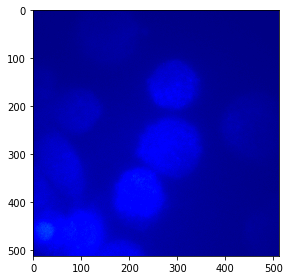

In [130]:
cur_img = imsk[25,5,:,:]
print(cur_img.shape)
io.imshow(cur_img, cmap='jet')

/gpfs/share/skynet/apps/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/gpfs/share/skynet/apps/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


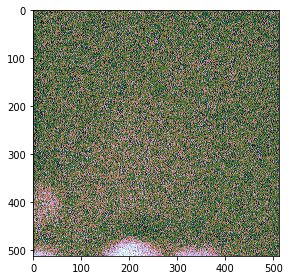

In [8]:
cur_img_adp =  exposure.equalize_adapthist(cur_img, clip_limit=0.01)
io.imshow(cur_img_adp, cmap='cubehelix')

/gpfs/share/skynet/apps/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/gpfs/share/skynet/apps/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


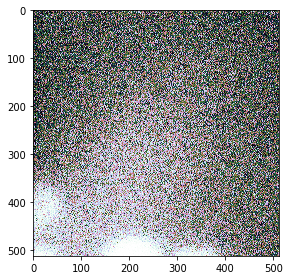

In [9]:
cur_img_hist =  exposure.equalize_hist(cur_img)
io.imshow(cur_img_hist, cmap='cubehelix')


In [30]:
dapi_entropy_list[np.array(dapi_entropy_list) > 6.7]

TypeError: only integer scalar arrays can be converted to a scalar index

In [22]:
test_str = 'test data_1_MMStack_Undefined119.ome.tif'
re.findall(r'\d+', test_str)[1]

'119'

In [14]:
len(dapi_entropy_list)

12000

0 - 95 percentiles of data:
[6.43988665 6.53086404 6.56718316 6.59840266 6.62708336 6.66000681
 6.69754734 6.736872   6.76492237 6.79373705 6.82431941 6.85807292
 6.89059898 6.92941294 6.97315114 7.0111759  7.04695083 7.08242597
 7.12861798 7.19778175]

In [88]:
dapi_entropy_list = [6.43988665 ,
6.53086404 ,
6.56718316 ,
6.59840266 ,
6.62708336 ,
6.66000681 ,
6.69754734 ,
6.736872 ,
6.76492237 ,
6.79373705 ,
6.82431941 ,
6.85807292 ,
6.89059898 ,
6.92941294 ,
6.97315114 ,
7.0111759 ,
7.04695083 ,
7.08242597 ,
7.12861798 ,
7.19778175]

In [120]:
decile_list = dapi_entropy_list[1::2]
image_dec_list = [0]*10
image_name_list = ['empty']*10
z_slice_list = [0]*10
parent_dir='/gpfs/data/lionnetlab/cellvision/pilotdata/20181009'

In [121]:
# if within 0.005 of the decile save the image's matrix
def get_decile_list(target_dir):   
    os.chdir(target_dir)
    for root, dirs, files in os.walk(parent_dir):
        for file in files:
            if file.endswith(".tif"):
                print(os.path.join(root, file))

                # read in 700 image set
                imsk = io.imread(os.path.join(root, file))
                #imsk = (imsk /256).astype('uint8')

                # one image is formatted differently than others
                if imsk.shape == (100, 7, 512, 512):
                    imsk = imsk.reshape(700, 512, 512)
                    print("image {} has wrong format. Format changed with numpy reshape.".format(file))

                #split from (700, 512, 512)
                imsk = np.split(imsk, 100) 
                imsk = np.array(imsk)

                # empty list for DAPI entropies
                #dapi_entropy_list = []

                for i in range(100):
                    for j in range(channel_count):
                        cur_img = imsk[i,6,:,:]
                        cur_entropy = measure.shannon_entropy(cur_img, base=2)
                        for count, decile in enumerate(decile_list):
                                if np.abs(cur_entropy - decile) < 0.005:
                                    image_dec_list[count] = cur_img
                                    image_name_list[count] = file
                                    z_slice_list[count] = i
                                    print("Image found for entropy decile {}".format(count+1))
                                    if all(isinstance(item, np.ndarray) for item in image_dec_list) == True:
                                        return(image_dec_list, image_name_list, z_slice_list)

In [122]:
image_dec_list, image_name_list, z_slice_list = get_decile_list(target_dir)

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined119.ome.tif
Image found for entropy decile 8
Image found for entropy decile 8
Image found for entropy decile 8
Image found for entropy decile 8
Image found for entropy decile 8
Image found for entropy decile 8
Image found for entropy decile 8
Image found for entropy decile 8
Image found for entropy decile 8
Image found for entropy decile 8
Image found for entropy decile 8
Image found for entropy decile 8
Image found for entropy decile 7
Image found for entropy decile 7
Image found for entropy decile 7
Image found for entropy decile 7
Image found for entropy decile 7
Image found for entropy decile 7
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for 

Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image foun

Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image foun

Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image foun

Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined116.ome.tif
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for 

Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image foun

Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 6
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image foun

Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image found for entropy decile 1
Image foun

/gpfs/data/lionnetlab/cellvision/pilotdata/20181009/test data_1_MMStack_Undefined83.ome.tif
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy decile 10
Image found for entropy 

Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image found for entropy decile 2
Image foun

Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image foun

Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 5
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 4
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
Image found for entropy decile 3
/gpfs/data

KeyboardInterrupt: 

In [124]:
for i in range(10):
    print(image_dec_list[i])
    print(image_name_list[i])
    print(z_slice_list[i])

[[187 251 183 ... 182 178 198]
 [150 182 185 ... 176 203 194]
 [171 181 182 ... 206 173 202]
 ...
 [215 197 146 ... 199 175 176]
 [176 176 170 ... 204 183 181]
 [181 170 145 ... 184 184 203]]
test data_1_MMStack_Undefined33.ome.tif
98
[[185 180 204 ... 182 162 188]
 [183 177 154 ... 197 190 139]
 [168 177 196 ... 167 161 137]
 ...
 [227 227 218 ... 209 172 202]
 [171 235 197 ... 165 185 198]
 [165 166 198 ... 207 177 174]]
test data_1_MMStack_Undefined33.ome.tif
25
[[153 172 177 ... 190 172 154]
 [178 186 162 ... 178 176 173]
 [194 210 159 ... 141 185 167]
 ...
 [179 188 169 ... 183 219 168]
 [142 152 160 ... 183 212 184]
 [172 175 180 ... 175 151 202]]
test data_1_MMStack_Undefined49.ome.tif
83
[[153 163 191 ... 187 206 210]
 [192 197 177 ... 212 183 191]
 [185 182 167 ... 204 172 193]
 ...
 [164 196 193 ... 189 171 208]
 [174 159 206 ... 200 227 193]
 [206 181 172 ... 203 178 189]]
test data_1_MMStack_Undefined49.ome.tif
71
[[229 184 195 ... 193 186 171]
 [205 172 213 ... 181 171 210

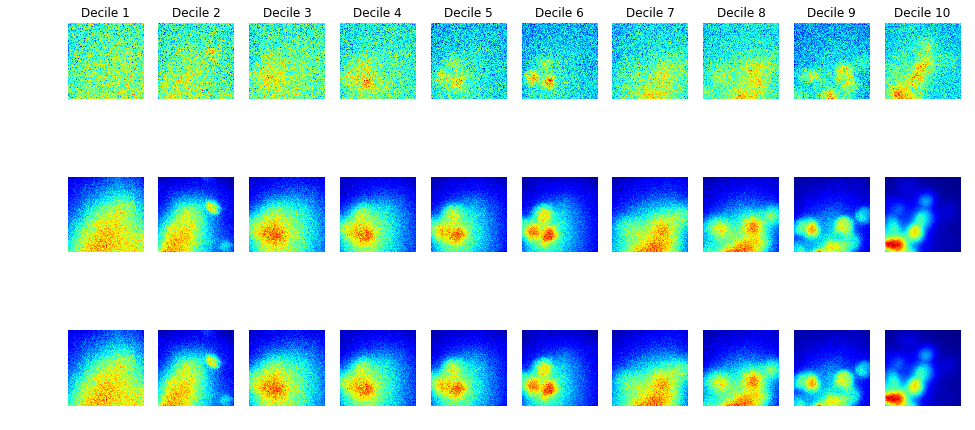

In [143]:
root = '/gpfs/data/lionnetlab/cellvision/pilotdata/20181009'
fig, axes = plt.subplots(3, 10, figsize=(16, 8))#, sharex=True, sharey=True)
ax = axes.ravel()

cols = ['Decile {}'.format(col) for col in range(1, 11)]
rows = ['DAPI', 'Channel 2', 'Channel 6']

for i in range(10):
    ax[i].imshow(image_dec_list[i], cmap='jet')

for i in range(10):
    imsk = io.imread(os.path.join(root, image_name_list[i]))
    imsk = np.split(imsk, 100) 
    imsk = np.array(imsk)
    ax[i+10].imshow(imsk[z_slice_list[i],2,:,:], cmap='jet')

for i in range(10):
    imsk = io.imread(os.path.join(root, image_name_list[i]))
    imsk = np.split(imsk, 100) 
    imsk = np.array(imsk)
    ax[i+20].imshow(imsk[z_slice_list[i],2,:,:], cmap='jet')


for a in ax:
    a.set_axis_off()
    
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')

#fig.tight_layout()
plt.show()